<a href="https://colab.research.google.com/github/geoifg/SMS/blob/main/Atividade_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL do dataset
url = "https://raw.githubusercontent.com/geoifg/SMS/refs/heads/main/dados_imobiliarios.csv"


In [3]:
# Carregar o dataset do GitHub. É muito usual encontrar o termo "df", remete a "data frame" ou "quadro de dados"
df = pd.read_csv(url, sep=";")

In [8]:
# Exibir as primeiras linhas
print("Visualização inicial dos dados:")
print(df.head())

Visualização inicial dos dados:
   condominio  quartos  suites  vagas  area  bairro  atualizacao   preco  \
0         350        1     0.0    1.0    21       1            1  340000   
1         800        1     0.0    1.0    64       1            0  770000   
2         674        1     0.0    1.0    61       1            1  600000   
3         700        1     1.0    1.0    70       1            0  700000   
4         440        1     0.0    1.0    44       1            2  515000   

   distancia       pm2 Classificacao  
0       99.0  16190.48     Econômico  
1       99.0  12031.25          Luxo  
2       99.0   9836.07        Padrão  
3       99.0  10000.00        Padrão  
4       99.0  11704.55        Padrão  


In [5]:
# Informações gerais do dataset
print("\nInformações do dataset:")
print(df.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   condominio   1997 non-null   int64  
 1   quartos      1997 non-null   int64  
 2   suites       1997 non-null   float64
 3   vagas        1997 non-null   float64
 4   area         1997 non-null   int64  
 5   bairro       1997 non-null   int64  
 6   atualizacao  1997 non-null   int64  
 7   preco        1997 non-null   int64  
 8   distancia    1997 non-null   float64
 9   pm2          1997 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 156.1 KB
None


In [6]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
        condominio      quartos       suites        vagas         area  \
count  1997.000000  1997.000000  1997.000000  1997.000000  1997.000000   
mean    971.087631     2.128693     1.039559     1.153230    90.051577   
std     653.893691     0.793866     0.443091     0.453837    46.417486   
min       1.000000     1.000000     0.000000     0.000000    19.000000   
25%     550.000000     1.000000     1.000000     1.000000    60.000000   
50%     800.000000     2.000000     1.000000     1.000000    80.000000   
75%    1200.000000     3.000000     1.000000     1.000000   110.000000   
max    7071.000000     3.000000     3.000000     4.000000   475.000000   

            bairro  atualizacao         preco    distancia          pm2  
count  1997.000000  1997.000000  1.997000e+03  1997.000000   1997.00000  
mean      4.023035    55.635954  1.229410e+06    68.447531  13256.74635  
std       2.102215   144.306062  1.155809e+06    82.046778   6977.37614  
min       

In [7]:
# Criar uma nova coluna de classificação do imóvel
def classificar_imovel(preco): #A palavra-chave def significa definir uma função em Python. O nome da função aqui é "classificar_imovel", e ela recebe um parâmetro chamado "preco" (o preço do imóvel).
    if preco <= 500000: #Condição "Se". Se o preço do imóvel (preco) for menor ou igual a 500000, então a função retorna "Econômico"
        return "Econômico" #Atribuindo a palavra "Econômico" pelo peco ser menor ou igual a 500000.
    elif preco <= 700000: #Condição "Senão Se". Se a primeira condição (preco <= 500000) não for verdadeira, o Python verifica essa segunda condição.
        return "Padrão"
    else:                 #Condição "SENÃO" → ou seja, qualquer outro caso que não se encaixe nas condições anteriores.
        return "Luxo"

#apply() aplica a função "classificar_imovel" para cada linha da coluna "preco"
df["Classificacao"] = df["preco"].apply(classificar_imovel)

In [9]:
# Exibir as primeiras linhas
print("Visualização inicial dos dados:")
print(df.head())

Visualização inicial dos dados:
   condominio  quartos  suites  vagas  area  bairro  atualizacao   preco  \
0         350        1     0.0    1.0    21       1            1  340000   
1         800        1     0.0    1.0    64       1            0  770000   
2         674        1     0.0    1.0    61       1            1  600000   
3         700        1     1.0    1.0    70       1            0  700000   
4         440        1     0.0    1.0    44       1            2  515000   

   distancia       pm2 Classificacao  
0       99.0  16190.48     Econômico  
1       99.0  12031.25          Luxo  
2       99.0   9836.07        Padrão  
3       99.0  10000.00        Padrão  
4       99.0  11704.55        Padrão  


In [10]:
# Exibir distribuição de classes
print("\nDistribuição de Classificação dos Imóveis:")
print(df["Classificacao"].value_counts())


Distribuição de Classificação dos Imóveis:
Classificacao
Luxo         1251
Econômico     403
Padrão        343
Name: count, dtype: int64


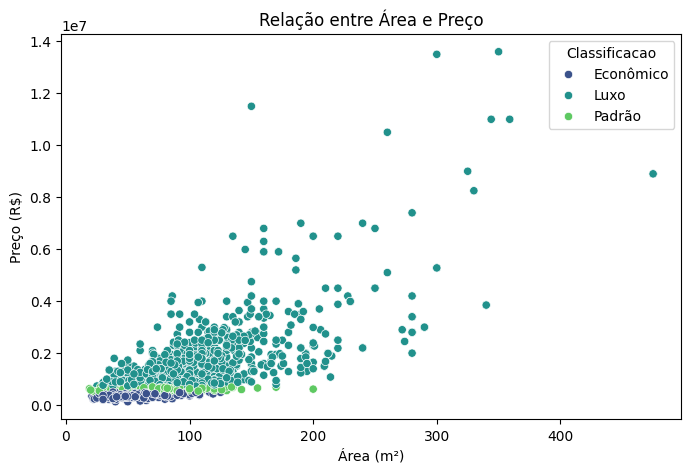

In [11]:
# Criar um gráfico de dispersão entre área e preço
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["area"], y=df["preco"], hue=df["Classificacao"], palette="viridis")
plt.xlabel("Área (m²)")
plt.ylabel("Preço (R$)")
plt.title("Relação entre Área e Preço")
plt.show()

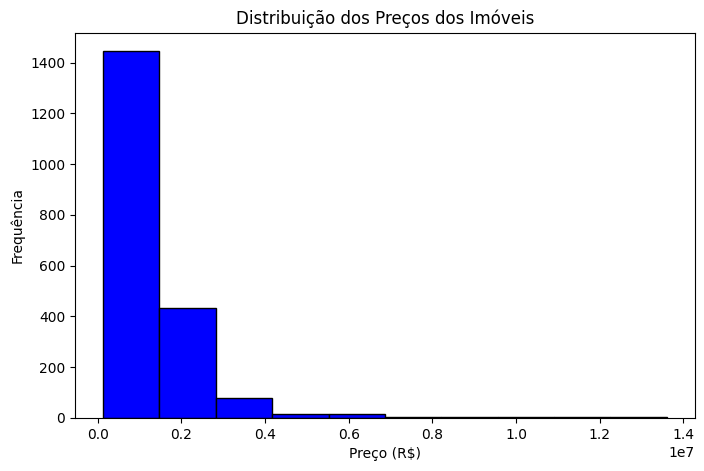

In [12]:
# Criar um histograma dos preços
plt.figure(figsize=(8,5))
plt.hist(df["preco"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Preço (R$)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Preços dos Imóveis")
plt.show()

In [13]:
# Calcular a média do preço por número de quartos
media_por_quartos = df.groupby("quartos")["preco"].mean()
print("\nPreço médio por número de quartos:")
print(media_por_quartos)


Preço médio por número de quartos:
quartos
1    6.301373e+05
2    1.034939e+06
3    1.807086e+06
Name: preco, dtype: float64
